<h1 style="color: rgb(0, 133, 202);">Outliers</h1>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

<h2 style="color: rgb(0, 133, 202);">The Morley Dataset</h2>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 14, 10

In [7]:
#read in the dataset from a csv file located online. Converts to a Dataframe.
df = pd.read_csv("https://r-data.pmagunia.com/system/files/datasets/dataset-77488.csv")
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Expt,Run,Speed
0,1,1,850
1,1,2,740
2,1,3,900
3,1,4,1070
4,1,5,930


In [8]:
exptOne = df.loc[df['Expt']==1]
exptTwo = df.loc[df['Expt']==2]
exptThree = df.loc[df['Expt']==3]
exptFour = df.loc[df['Expt']==4]
exptFive = df.loc[df['Expt']==5]

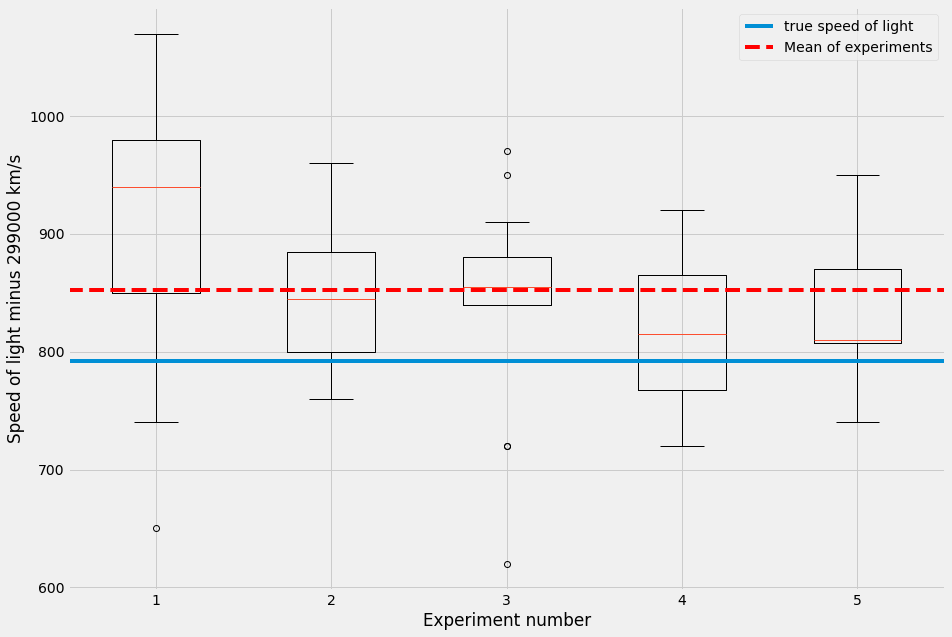

In [9]:
plt.boxplot(np.array([exptOne['Speed'], exptTwo['Speed'], exptThree['Speed'], exptFour['Speed'], exptFive['Speed']]).T)
plt.axhline(792.458, label = 'true speed of light')
plt.axhline(df['Speed'].mean(), color = 'r', label = 'Mean of experiments', ls = '--')
plt.xlabel(xlabel = 'Experiment number')
plt.ylabel(ylabel = 'Speed of light minus 299000 km/s')
plt.legend();

<h2 style="color: rgb(0, 133, 202);">The Iris Dataset</h2>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

In [47]:
#loads the iris dataset as sklearn bunch. as_frame generates a pandas Dataframe containing the data
iris = sk.datasets.load_iris(as_frame=True)

In [48]:
print(type(iris.frame))
iris.frame.head()

<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [49]:
attr = iris.feature_names
attr

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

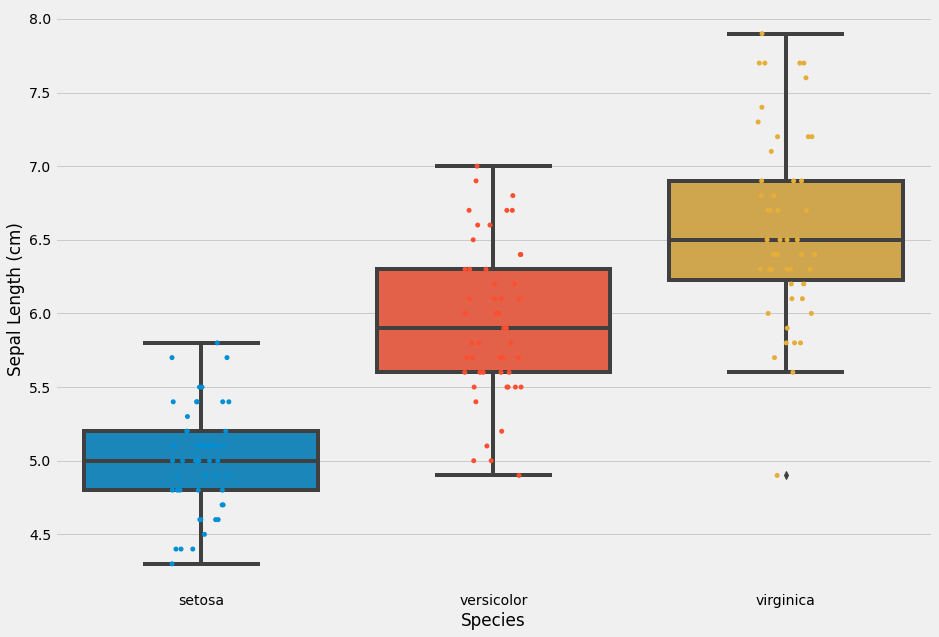

In [59]:
ax = sns.boxplot(x='target',y='sepal length (cm)',data=iris.frame)
ax=sns.stripplot(x='target',y='sepal length (cm)',data=iris.frame,jitter=True,edgecolor='gray')
ax.set(xlabel='Species', ylabel='Sepal Length (cm)')
ax.set_xticklabels(iris.target_names)

[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

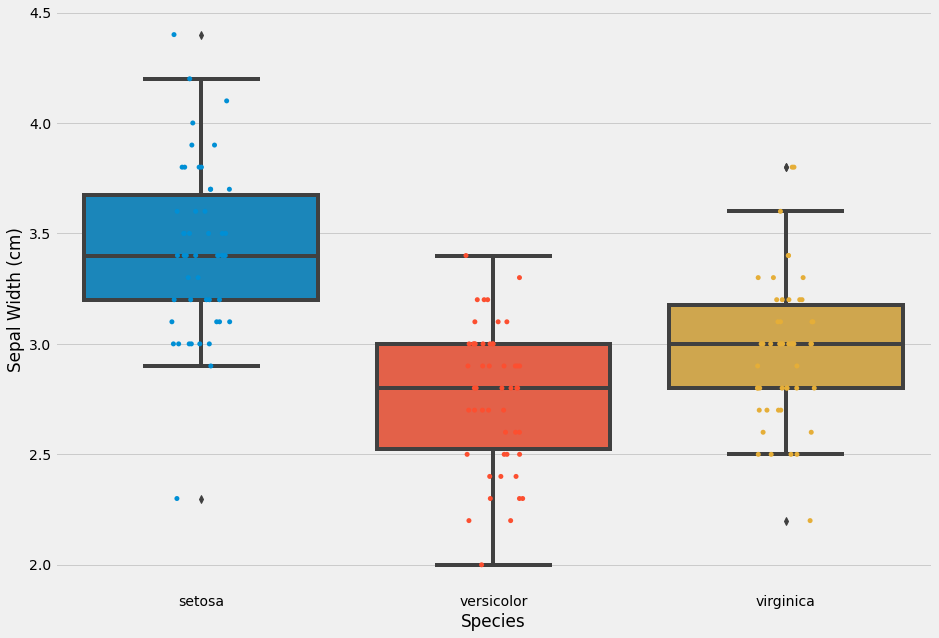

In [61]:
ax = sns.boxplot(x='target',y='sepal width (cm)',data=iris.frame)
ax=sns.stripplot(x='target',y='sepal width (cm)',data=iris.frame,jitter=True,edgecolor='gray')
ax.set(xlabel='Species', ylabel='Sepal Width (cm)')
ax.set_xticklabels(iris.target_names)

[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

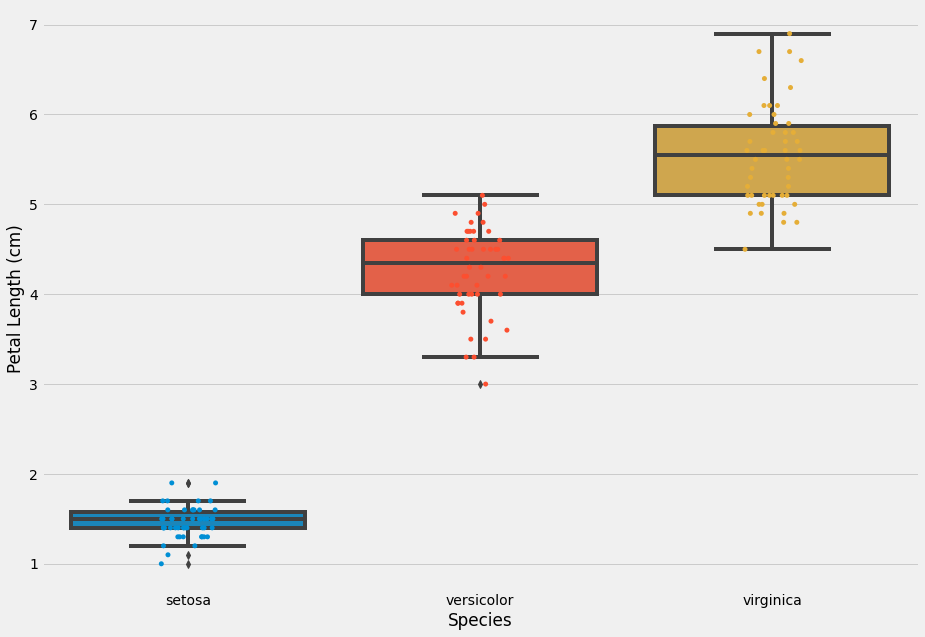

In [60]:
ax = sns.boxplot(x='target',y='petal length (cm)',data=iris.frame)
ax=sns.stripplot(x='target',y='petal length (cm)',data=iris.frame,jitter=True,edgecolor='gray')
ax.set(xlabel='Species', ylabel='Petal Length (cm)')
ax.set_xticklabels(iris.target_names)

[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

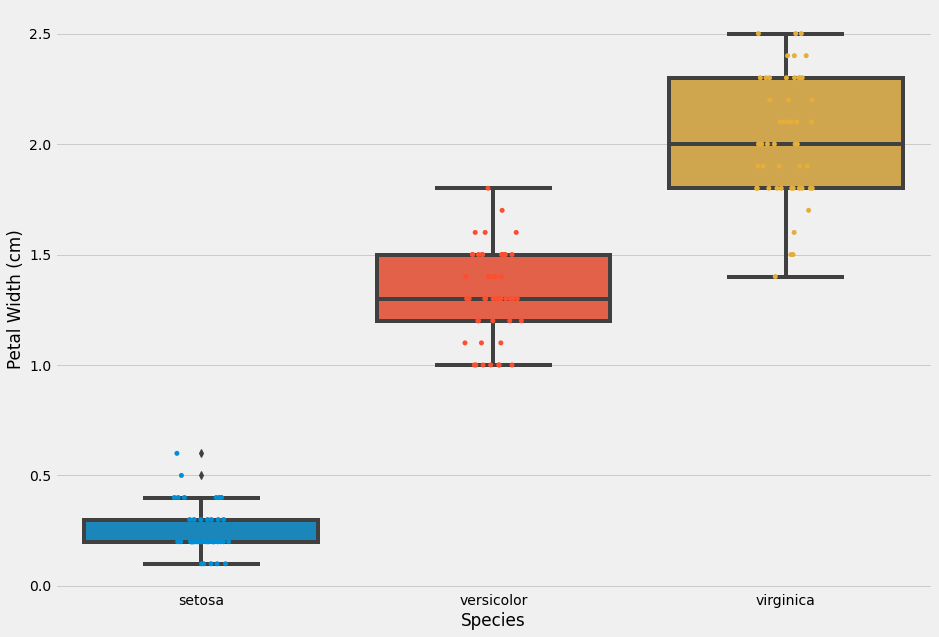

In [65]:
ax = sns.boxplot(x='target',y='petal width (cm)',data=iris.frame)
ax=sns.stripplot(x='target',y='petal width (cm)',data=iris.frame,jitter=True,edgecolor='gray')
ax.set(xlabel='Species', ylabel='Petal Width (cm)')
ax.set_xticklabels(iris.target_names)